# **1. Perkenalan Dataset**

Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [3]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.feature_selection import SelectKBest, mutual_info_classif


# Menonaktifkan peringatan
import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Memuat dataset
df = pd.read_csv('/content/drive/MyDrive/dataset_clustering/bank_transactions_data_2.csv')

# Menampilkan 5 baris pertama dataset
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

### 1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

In [6]:
row, col = df.shape
print(f"Jumlah kolom: {col}")
print(f"Jumlah baris: {row}")

df.info()

Jumlah kolom: 16
Jumlah baris: 2512
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   i

### 2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

In [7]:
df.isnull().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


### 3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.


Statistik deskriptif variabel numerik:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2512.000000  2512.000000          2512.000000    2512.000000   
mean          297.593778    44.673965           119.643312       1.124602   
std           291.946243    17.792198            69.963757       0.602662   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.885000    27.000000            63.000000       1.000000   
50%           211.140000    45.000000           112.500000       1.000000   
75%           414.527500    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2512.000000  
mean      5114.302966  
std       3900.942499  
min        101.250000  
25%       1504.370000  
50%       4735.510000  
75%       7678.820000  
max      14977.990000  


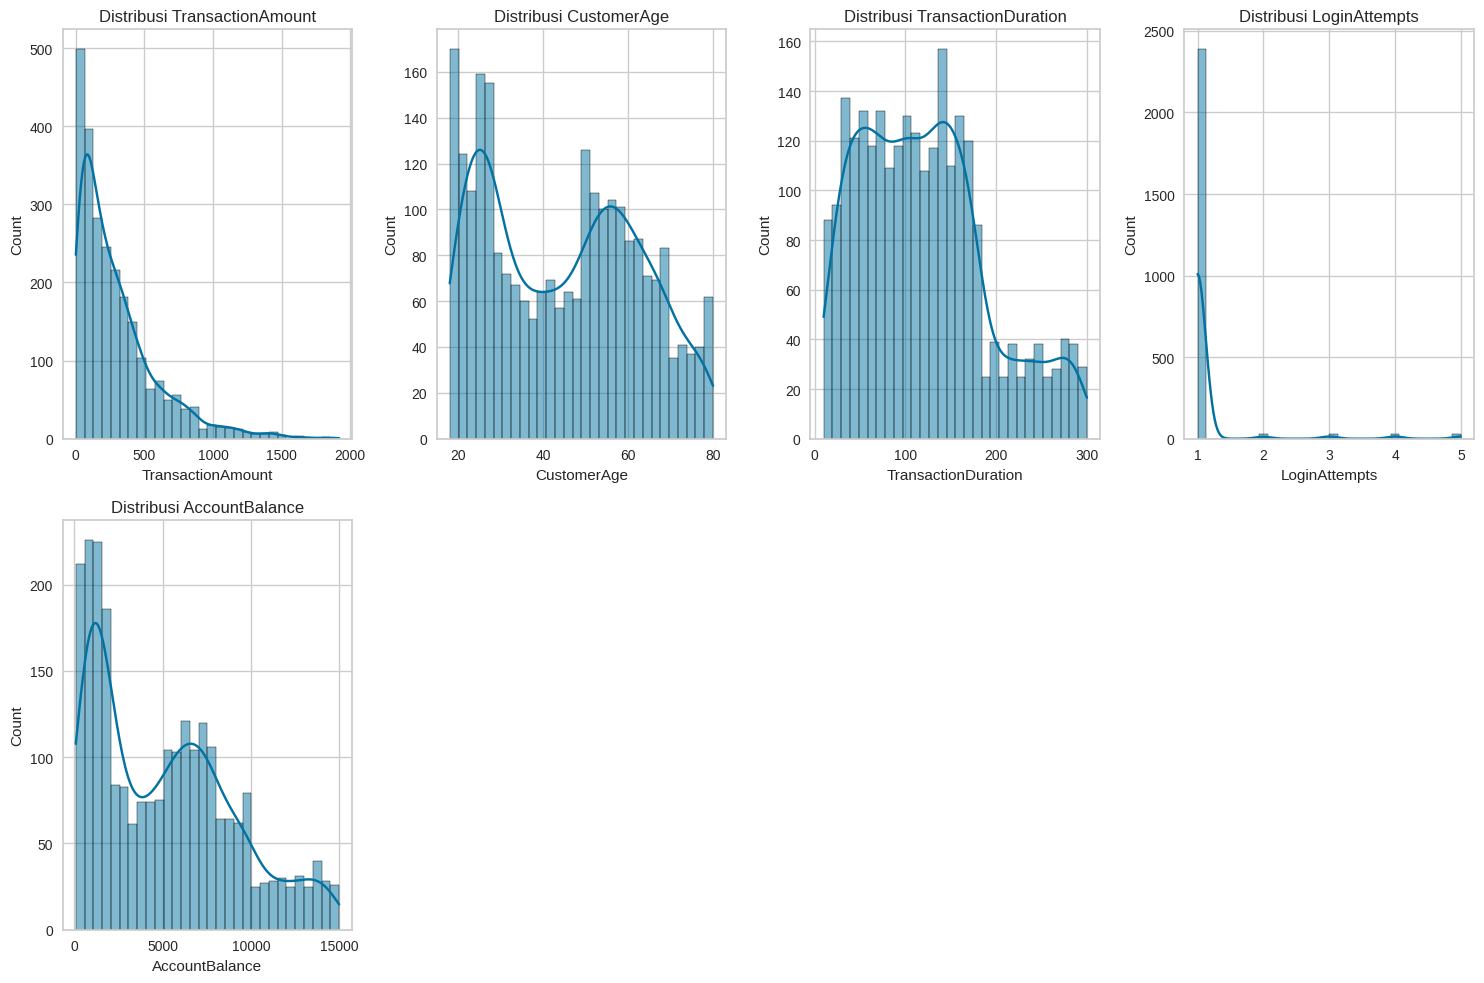

In [8]:
# Statistik deskriptif untuk variabel numerik
print("\nStatistik deskriptif variabel numerik:")
print(df.describe())

# Menentukan kolom numerik
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Menghitung jumlah subplot yang diperlukan
num_columns = len(numerical_columns)
cols = 4  # Menetapkan 4 kolom dalam subplot grid
rows = math.ceil(num_columns / cols)  # Menyesuaikan jumlah baris

# Membuat plot histogram untuk distribusi data
plt.figure(figsize=(15, 5 * rows))  # Sesuaikan ukuran agar tidak terlalu rapat

for i, col in enumerate(numerical_columns):
    plt.subplot(rows, cols, i + 1)  # Gunakan `rows` yang disesuaikan
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')

plt.tight_layout()
plt.show()

### 4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

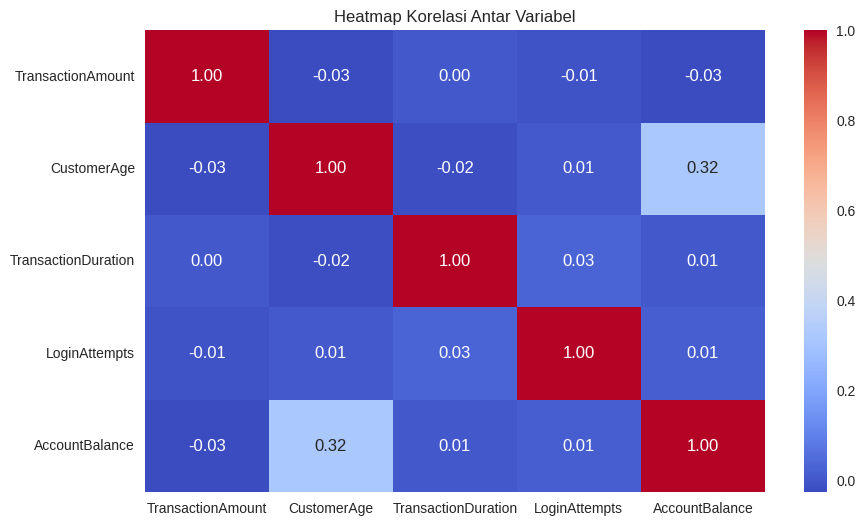

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

Kesimpulan:

- AccountBalance vs CustomerAge memiliki korelasi lebih tinggi dari pada kolom lain yaitu 0.32.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

## a. Menghapus atau Menangani Data Kosong (Missing Values)

In [11]:
df_clean = df.copy()

In [12]:
features = ['TransactionAmount', 'TransactionType', 'Channel', 'TransactionDuration', 'CustomerAge', 'LoginAttempts', 'AccountBalance']
df_clean = df_clean[features]

In [13]:
df_clean.isnull().sum()

,0
TransactionAmount,0
TransactionType,0
Channel,0
TransactionDuration,0
CustomerAge,0
LoginAttempts,0
AccountBalance,0


## b. Menghapus Data Duplikat

In [14]:
df_clean.duplicated().sum()

np.int64(0)

## c. Deteksi dan Penanganan Outlier

TransactionAmount column: 113 outlier
TransactionDuration column: 0 outlier
CustomerAge column: 0 outlier
LoginAttempts column: 122 outlier
AccountBalance column: 0 outlier


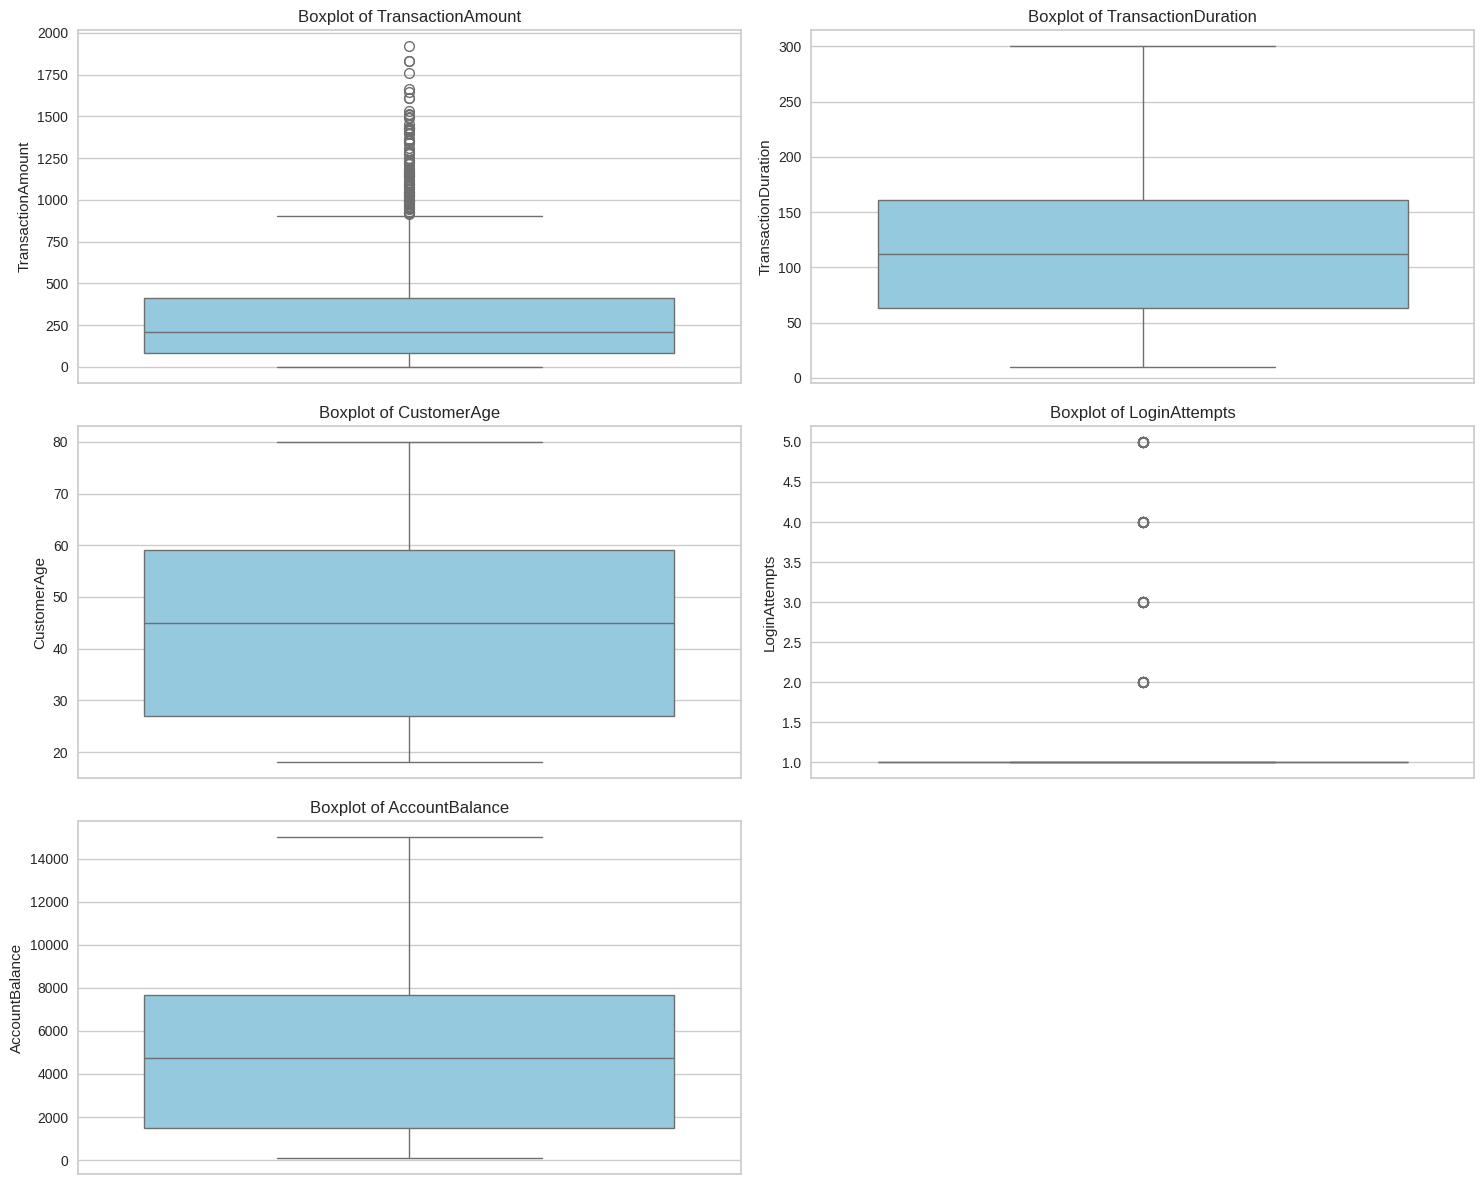

In [15]:
numeric_columns = df_clean.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 12))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=df_clean[col], color="skyblue")
    plt.title(f"Boxplot of {col}")

    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    print(f"{col} column: {len(outliers)} outlier")

plt.tight_layout()
plt.show()

Kesimpulan:

- pada kolom TransactionAmount memiliki outlier sebanyak 113 outlier.
- pada kolom LoginAttempts memiliki 122 outlier.

In [16]:
columns_to_check = df_clean.select_dtypes(include=['number']).columns

def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

df_clean = remove_outliers(df_clean, columns_to_check)

TransactionAmount column: 45 outlier
TransactionDuration column: 0 outlier
CustomerAge column: 0 outlier
LoginAttempts column: 0 outlier
AccountBalance column: 0 outlier


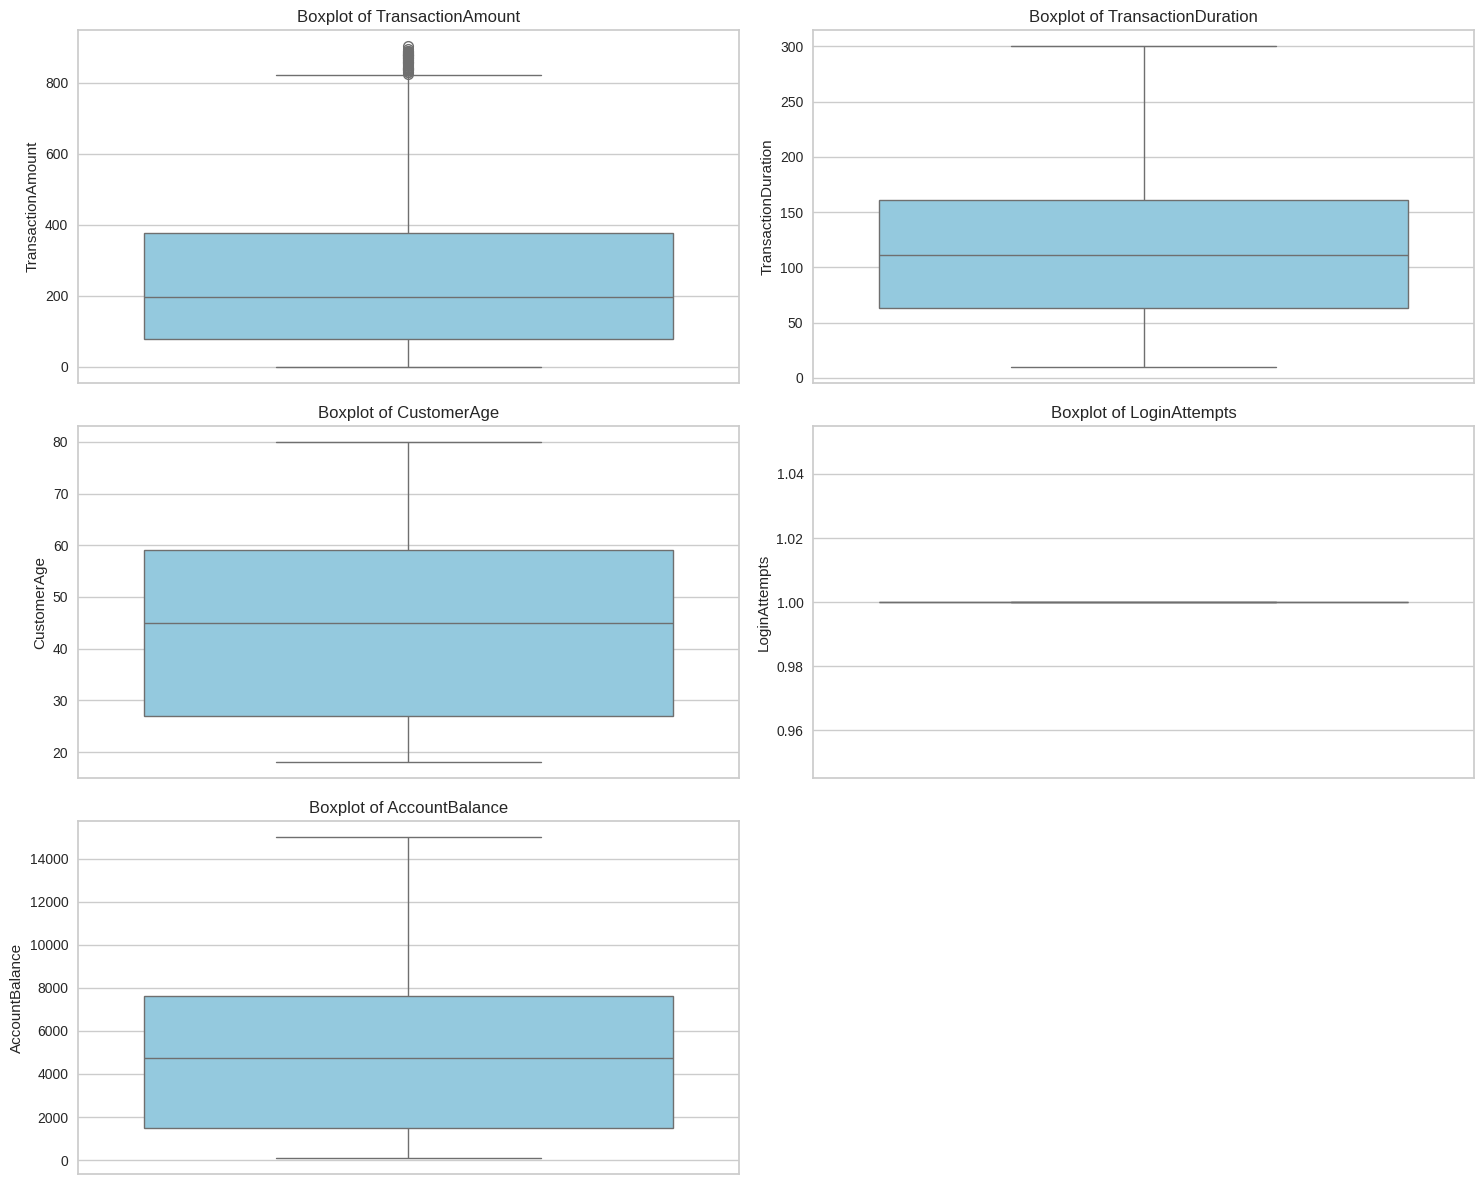

In [17]:
numeric_columns = df_clean.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 12))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=df_clean[col], color="skyblue")
    plt.title(f"Boxplot of {col}")

    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    print(f"{col} column: {len(outliers)} outlier")

plt.tight_layout()
plt.show()

## d. Encoding Data Kategorikal

In [18]:
categorical_columns = ['TransactionType', 'Channel']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
categorical_encoded = encoder.fit_transform(df_clean[categorical_columns])
categorical_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out())

## e. Normalisasi atau Standarisasi Fitur

In [19]:
numerical_columns = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(df_clean[numerical_columns])
numerical_df = pd.DataFrame(numerical_scaled, columns=numerical_columns)

In [20]:
df_clean = pd.concat([numerical_df, categorical_df], axis=1)
df_clean

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online
0,0.015317,0.838710,0.244828,0.0,0.336832,0.0,1.0,1.0,0.0,0.0
1,0.416400,0.806452,0.451724,0.0,0.918055,0.0,1.0,1.0,0.0,0.0
2,0.139579,0.016129,0.158621,0.0,0.068637,0.0,1.0,0.0,0.0,1.0
3,0.204047,0.129032,0.051724,0.0,0.569198,0.0,1.0,0.0,0.0,1.0
4,0.014608,0.129032,0.648276,0.0,0.492591,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2277,0.947969,0.241935,0.341379,0.0,0.846257,1.0,0.0,0.0,1.0,0.0
2278,0.278294,0.483871,0.575862,0.0,0.010318,0.0,1.0,0.0,1.0,0.0
2279,0.031420,0.612903,0.468966,0.0,0.220590,0.0,1.0,0.0,1.0,0.0
2280,0.205675,0.080645,0.031034,0.0,0.112636,0.0,1.0,0.0,0.0,1.0


Kesimpulan:

Data telah dinormalisasi.

## f. Binning (Pengelompokan Data)

In [21]:
# Menerapkan Equal-Width Binning dengan 4 kategori
def equal_width_binning(column):
    return pd.cut(column, bins=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Menerapkan binning pada 4 fitur utama
binned_df = df_clean.copy()
features_to_bin = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

# Menerapkan binning pada 4 fitur utama
for feature in features_to_bin:
    binned_df[feature + '_bin'] = equal_width_binning(binned_df[feature])

# Menampilkan hasil binning pada 4 fitur utama
binned_df[features_to_bin + [col + '_bin' for col in features_to_bin]].head()


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionAmount_bin,CustomerAge_bin,TransactionDuration_bin,LoginAttempts_bin,AccountBalance_bin
0,0.015317,0.838710,0.244828,0.0,0.336832,Low,Very High,Low,Medium,Medium
1,0.416400,0.806452,0.451724,0.0,0.918055,Medium,Very High,Medium,Medium,Very High
2,0.139579,0.016129,0.158621,0.0,0.068637,Low,Low,Low,Medium,Low
3,0.204047,0.129032,0.051724,0.0,0.569198,Low,Low,Low,Medium,High
4,0.014608,0.129032,0.648276,0.0,0.492591,Low,Low,High,Medium,Medium


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [22]:
X = df_clean.iloc[:, [0, 1, 2, 3, 4, 5, 6]].values
print(pd.DataFrame(X, columns=['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'TransactionType_Credit', 'TransactionType_Debit']))


      TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0              0.015317     0.838710             0.244828            0.0   
1              0.416400     0.806452             0.451724            0.0   
2              0.139579     0.016129             0.158621            0.0   
3              0.204047     0.129032             0.051724            0.0   
4              0.014608     0.129032             0.648276            0.0   
...                 ...          ...                  ...            ...   
2277           0.947969     0.241935             0.341379            0.0   
2278           0.278294     0.483871             0.575862            0.0   
2279           0.031420     0.612903             0.468966            0.0   
2280           0.205675     0.080645             0.031034            0.0   
2281           0.268925     0.096774             0.286207            0.0   

      AccountBalance  TransactionType_Credit  TransactionType_Debit  
0           0.336

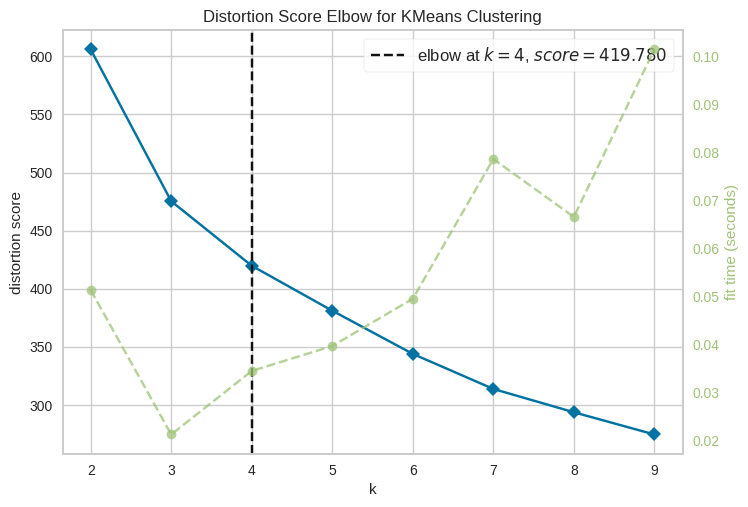

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
kmeans = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(kmeans, k=(2, 10))
visualizer.fit(X)
visualizer.show()

## b. Evaluasi Model Clustering

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah rekomendasi tahapannya.

Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [24]:
kmeans_before = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = kmeans_before.fit_predict(df_clean)

In [25]:
silhouette_avg = silhouette_score(df_clean, labels)
print(f'Silhouette Score sebelum feature selection: {silhouette_avg :.2f}')

Silhouette Score sebelum feature selection: 0.49


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [26]:
selector = SelectKBest(mutual_info_classif, k=6)
X = selector.fit_transform(df_clean, np.zeros(df_clean.shape[0]))

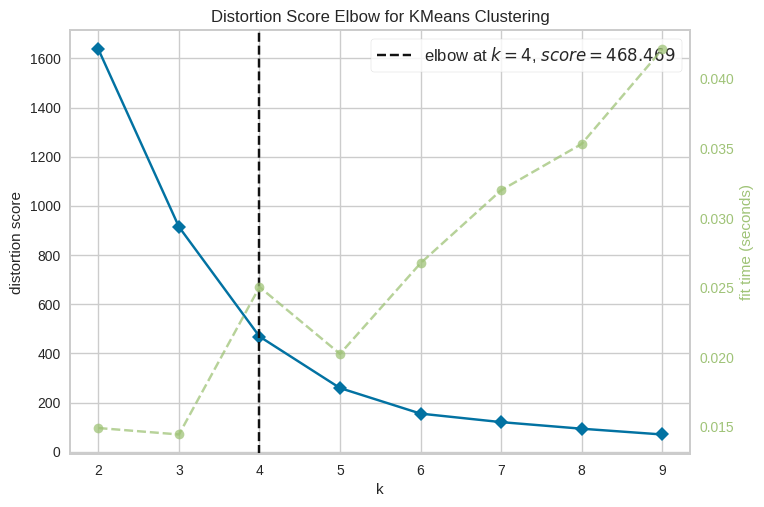

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
kmeans = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(kmeans, k=(2, 10))
visualizer.fit(X)
visualizer.show()

In [28]:
kmeans_after = KMeans(n_clusters=5, random_state=42, n_init=10)
labels = kmeans_after.fit_predict(X)

In [29]:
silhouette_avg = silhouette_score(X, labels)
print(f'Silhouette Score setelah di feature selection: {silhouette_avg :.2f}')

Silhouette Score setelah di feature selection: 0.76


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah rekomendasi tahapannya.

Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

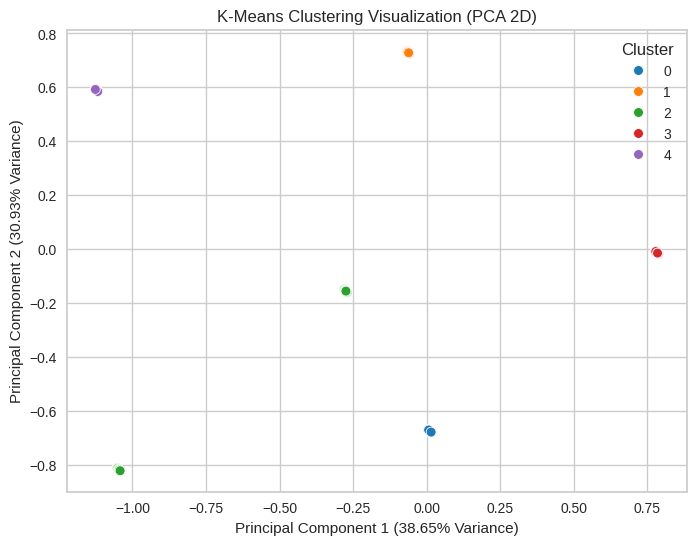

In [30]:
# Reduksi Dimensi dengan PCA (2 Komponen)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Visualisasi PCA 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=labels, palette='tab10', s=50
)
plt.title('K-Means Clustering Visualization (PCA 2D)')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} Variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} Variance)')
plt.legend(title='Cluster')
plt.show()

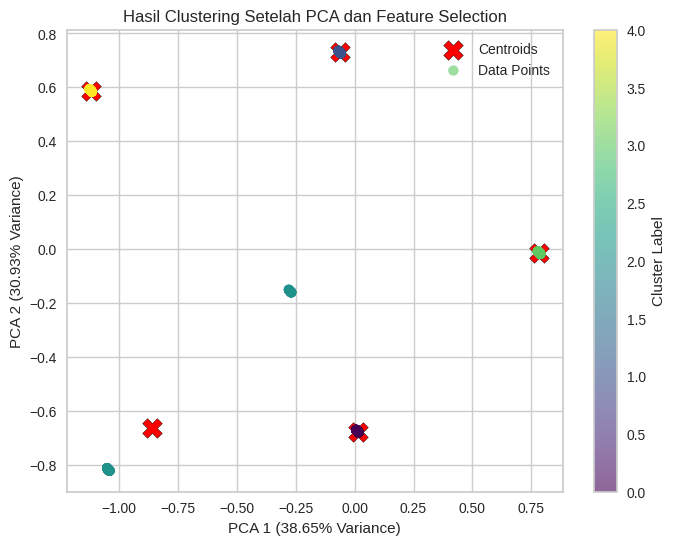

In [31]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)
centroids_pca = pca.transform(kmeans_after.cluster_centers_)

explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8,6))
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, edgecolors='black', label="Centroids")
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6, label="Data Points")
plt.colorbar(scatter, label="Cluster Label")

plt.xlabel(f'PCA 1 ({explained_variance[0]:.2%} Variance)')
plt.ylabel(f'PCA 2 ({explained_variance[1]:.2%} Variance)')
plt.title('Hasil Clustering Setelah PCA dan Feature Selection')

plt.legend()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [32]:
df_normalized = df_clean.copy()

In [33]:
df_normalized['Cluster'] = kmeans_after.labels_

In [34]:
decoded_categories = encoder.inverse_transform(categorical_encoded)
decoded_df = pd.DataFrame(decoded_categories, columns=categorical_columns)

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [35]:
original_numerical = scaler.inverse_transform(numerical_scaled)
original_numerical_df = pd.DataFrame(original_numerical, columns=numerical_columns)

In [36]:
df_normalized = pd.concat([decoded_df, original_numerical_df], axis=1)
df_normalized['Cluster'] = kmeans_after.labels_
df_normalized['CustomerAge'] = df_normalized['CustomerAge'].astype(int)
df_normalized

,TransactionType,Channel,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Cluster
0,Debit,ATM,14.09,70,81.0,1.0,5112.21,3
1,Debit,ATM,376.24,68,141.0,1.0,13758.91,3
2,Debit,Online,126.29,19,56.0,1.0,1122.35,0
3,Debit,Online,184.50,26,25.0,1.0,8569.06,0
4,Credit,Online,13.45,26,198.0,1.0,7429.40,2
...,...,...,...,...,...,...,...,...
2277,Credit,Branch,856.21,33,109.0,1.0,12690.79,4
2278,Debit,Branch,251.54,48,177.0,1.0,254.75,1
2279,Debit,Branch,28.63,56,146.0,1.0,3382.91,1
2280,Debit,Online,185.97,23,19.0,1.0,1776.91,0


In [37]:
df_normalized.groupby('Cluster')[df_normalized.select_dtypes(include='number').columns].mean().astype({'CustomerAge': 'int', 'Cluster': 'int'})

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Cluster
Cluster,,,,,,
0,256.619825,43,119.372816,1.0,4869.755456,0
1,238.053016,43,115.088183,1.0,5305.107866,1
2,262.531742,45,122.571429,1.0,5335.897526,2
3,255.910381,45,121.680352,1.0,5066.025323,3
4,286.132684,46,115.151515,1.0,5110.222251,4


In [38]:
df_normalized.groupby('Cluster').agg(lambda x: x.mode()[0])

,TransactionType,Channel,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
Cluster,,,,,,,
0,Debit,Online,16.73,28,68.0,1.0,101.25
1,Debit,Branch,28.38,27,63.0,1.0,117.98
2,Credit,Online,425.18,26,109.0,1.0,125.85
3,Debit,ATM,29.22,27,63.0,1.0,112.76
4,Credit,Branch,3.30,28,44.0,1.0,105.01


In [39]:
df_normalized.groupby('Cluster')[df_normalized.select_dtypes(include='object').columns].value_counts()

Cluster  TransactionType  Channel
0        Debit            Online     515
1        Debit            Branch     567
2        Credit           Online     219
                          ATM         68
3        Debit            ATM        682
4        Credit           Branch     231
Name: count, dtype: int64

### Kesimpulan Hasil Interpretasi

1. Cluster 0

- Transaksi: Didominasi oleh transaksi debit melalui kanal online (515 transaksi).
- Rata-rata Fitur:
    - TransactionAmount: 256.62
    - CustomerAge: 43 tahun
    - TransactionDuration: 119.37 menit
    - LoginAttempts: 1 kali
    - AccountBalance: 4869.76

- Mode Fitur:
    - TransactionType: Debit
    - Channel: Online

2. Cluster 1

- Transaksi: Didominasi oleh transaksi debit melalui kanal branch (567 transaksi).
- Rata-rata Fitur:
    - TransactionAmount: 238.05
    - CustomerAge: 43 tahun
    - TransactionDuration: 115.08 menit
    - LoginAttempts: 1 kali
    - AccountBalance: 5305.10

- Mode Fitur:
    - TransactionType: Debit
    - Channel: Branch

3. Cluster 2

- Transaksi: Terdiri dari transaksi credit melalui kanal online (219 transaksi) dan ATM (68 transaksi).
- Rata-rata Fitur:
    - TransactionAmount: 262.53
    - CustomerAge: 45 tahun
    - TransactionDuration: 122.57 menit
    - LoginAttempts: 1 kali
    - AccountBalance: 5335.87

- Mode Fitur:
    - TransactionType: Credit
    - Channel: Online

4. Cluster 3

- Transaksi: Didominasi oleh transaksi debit melalui kanal ATM (682 transaksi).
- Rata-rata Fitur:
    - TransactionAmount: 255.91
    - CustomerAge: 45 tahun
    - TransactionDuration: 121.68 menit
    - LoginAttempts: 1 kali
    - AccountBalance: 5066.02

- Mode Fitur:
    - TransactionType: Debit
    - Channel: ATM

5. Cluster 4

- Transaksi: Didominasi oleh transaksi credit melalui kanal cabang (branch) (231 transaksi).
- Rata-rata Fitur:
    - TransactionAmount: 286.13
    - CustomerAge: 46 tahun
    - TransactionDuration: 115.15 menit
    - LoginAttempts: 1 kali
    - AccountBalance: 5110.22

- Mode Fitur:
    - TransactionType: Credit
    - Channel: Branch

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [40]:
df_normalized.to_csv("Dataset_clustering.csv", index=False)
print("Data berhasil diekspor ke Dataset_clustering.csv")

Data berhasil diekspor ke Dataset_clustering.csv
